<a href="https://colab.research.google.com/github/bpriyatha/Gramoday_Assignment/blob/main/Python_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PART A: Fetching the prices

In [227]:
import pandas as pd
import matplotlib.pyplot as plt

In [228]:
url='https://agmarknet.gov.in/SearchCmmMkt.aspx?Tx_Commodity=24&Tx_State=UP&Tx_District=1&Tx_Market=0&DateFrom=01-January-2020&DateTo=31-December-2020&Fr_Date=01-January-2020&To_Date=31-December-2020&Tx_Trend=0&Tx_CommodityHead=Potato&Tx_StateHead=Uttar+Pradesh&Tx_DistrictHead=Agra&Tx_MarketHead=--Select--'

In [226]:
data= pd.read_html(url)
data=pd.DataFrame(data[0])

data.shape

(51, 10)

Since this URL only gives us the access to 50 datasamples, we shall download the html file and upload it to the "\content\" 

In [229]:
data= pd.read_html('/content/Agmarknet_Price_Report (1).xls')     #path to the uploaded file
data=pd.DataFrame(data[0])
df=data.drop(['District Name','Commodity','Variety','Grade','Sl no.'],axis=1)
data.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,30 Dec 2020
1,2,Agra,Achnera,Potato,Desi,FAQ,800,900,850,29 Dec 2020
2,3,Agra,Achnera,Potato,Desi,FAQ,850,950,900,28 Dec 2020
3,4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,27 Dec 2020
4,5,Agra,Achnera,Potato,Desi,FAQ,800,900,850,26 Dec 2020


In [230]:
df

,Market Name,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,Achnera,900,1000,950,30 Dec 2020
1,Achnera,800,900,850,29 Dec 2020
2,Achnera,850,950,900,28 Dec 2020
3,Achnera,800,900,850,27 Dec 2020
4,Achnera,800,900,850,26 Dec 2020
...,...,...,...,...,...
1822,Samsabad,1000,1200,1100,06 Jan 2020
1823,Samsabad,1000,1200,1100,05 Jan 2020
1824,Samsabad,1100,1300,1200,04 Jan 2020
1825,Samsabad,1100,1300,1200,02 Jan 2020


In [231]:
df.shape

(1827, 5)

In [232]:
from datetime import datetime
from datetime import date
t=[]
for i in range(len(df['Price Date'])):

  t.append(datetime.strptime(df['Price Date'][i], '%d %b %Y'))
  t[i]=t[i].isoformat()

df['Price Date']=t
df.set_index("Price Date", inplace = True)

In [233]:
df=df.groupby('Market Name')

Filling the Missing Data of each Market

In [234]:
def fill(h):
  h=h.sort_values('Price Date')
  h.index = pd.DatetimeIndex(h.index)
  h = h.reindex(idx, fill_value=None)
  h=h.fillna(method ='pad')
  h=h.fillna(method='bfill')
  return h

In [235]:

idx = pd.date_range('2020-01-01','2020-12-31')

Agra=df.get_group('Agra')
Achnera=df.get_group('Achnera')
Fatehabad=df.get_group('Fatehabad')
Fatehpur_Sikri=df.get_group('Fatehpur Sikri')
Jagnair=df.get_group('Jagnair')
Jarar=df.get_group('Jarar')
Khairagarh=df.get_group('Khairagarh')
Samsabad=df.get_group('Samsabad')


Agra=fill(Agra)
Achnera=fill(Achnera)
Fatehabad=fill(Fatehabad)
Fatehpur_Sikri=fill(Fatehpur_Sikri)
Jagnair=fill(Jagnair)
Jarar=fill(Jarar)
Khairagarh=fill(Khairagarh)
Samsabad=fill(Samsabad)



In [236]:
Agra

,Market Name,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
2020-01-01,Agra,1300.0,1500.0,1400.0
2020-01-02,Agra,1300.0,1500.0,1400.0
2020-01-03,Agra,1300.0,1450.0,1380.0
2020-01-04,Agra,1240.0,1400.0,1310.0
2020-01-05,Agra,1240.0,1400.0,1310.0
...,...,...,...,...
2020-12-27,Agra,850.0,1100.0,980.0
2020-12-28,Agra,800.0,1100.0,950.0
2020-12-29,Agra,800.0,1080.0,950.0
2020-12-30,Agra,800.0,1050.0,940.0


Marketwise Pattern of Prices over the year 

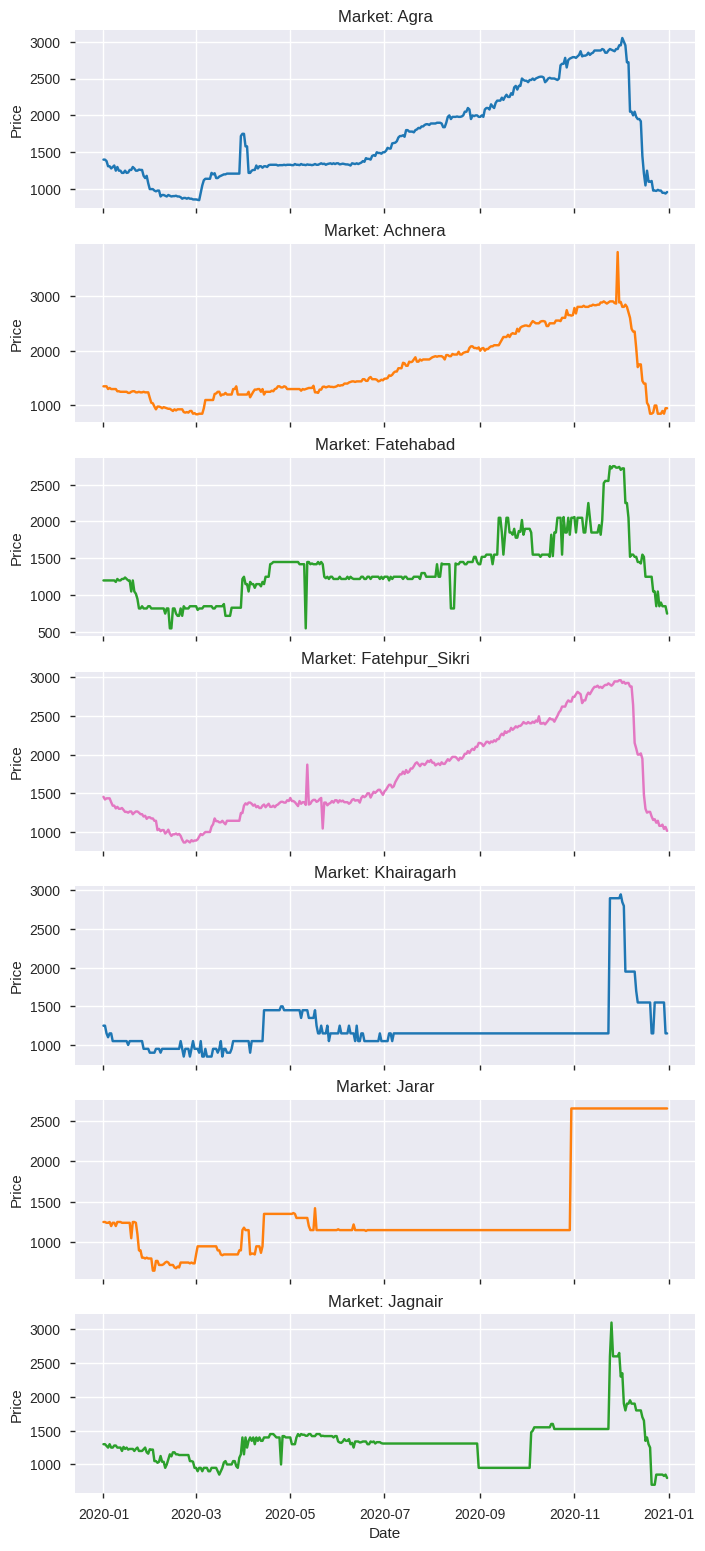

In [262]:
fig, axs = plt.subplots(7,figsize=(8,19))
axs[0].plot(Agra['Modal Price (Rs./Quintal)'])
axs[0].set_title('Market: Agra')
axs[1].plot(Achnera['Modal Price (Rs./Quintal)'], 'tab:orange')
axs[1].set_title('Market: Achnera')
axs[2].plot(Fatehabad['Modal Price (Rs./Quintal)'], 'tab:green')
axs[2].set_title('Market: Fatehabad')
axs[3].plot(Fatehpur_Sikri['Modal Price (Rs./Quintal)'], 'tab:pink')
axs[3].set_title('Market: Fatehpur_Sikri')
axs[4].plot(Khairagarh['Modal Price (Rs./Quintal)'], 'tab:blue')
axs[4].set_title('Market: Khairagarh')
axs[5].plot(Jarar['Modal Price (Rs./Quintal)'], 'tab:orange')
axs[5].set_title('Market: Jarar')
axs[6].plot(Jagnair['Modal Price (Rs./Quintal)'], 'tab:green')
axs[6].set_title('Market: Jagnair')
for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Price')
for ax in fig.get_axes():
  ax.label_outer()



In [239]:
data.shape

(1827, 10)

Predicting prices for a given market say Agra

In [241]:
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [242]:
#defining loss funtion
import keras.backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [243]:
from keras.models import Sequential
from keras.layers import LSTM,Reshape
from keras.layers import Dense
import numpy as np
from numpy import array,hstack

 
# define input sequence
in_seq0=np.array(Agra['Min Price (Rs./Quintal)'][0:300])
in_seq1 = np.array(Agra['Modal Price (Rs./Quintal)'][0:300])
in_seq2 = np.array(Agra['Max Price (Rs./Quintal)'][0:300])
in_seq0 = in_seq0.reshape((len(in_seq0), 1))
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))

# horizontally stack columns
trainset = hstack((in_seq0, in_seq1, in_seq2))

# Number of time steps
n_in = 4
n_out=2
# convert into input/output
X, y = split_sequence(trainset, n_in,n_out)

#feature are Min.Max,Modal prices of prev dates
n_features = X.shape[2]


# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Reshape((n_out,-1)))
model.add(Dense(n_features))
model.summary()
model.compile(optimizer='adam', loss=root_mean_squared_error)
model.fit(X, y, epochs=400, verbose=0)



Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 4, 100)            41600     
_________________________________________________________________
lstm_25 (LSTM)               (None, 100)               80400     
_________________________________________________________________
reshape_10 (Reshape)         (None, 2, 50)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 2, 3)              153       
Total params: 122,153
Trainable params: 122,153
Non-trainable params: 0
_________________________________________________________________


In [244]:
X.shape

(295, 4, 3)

Predicting Test Data

In [245]:
in_seq0=np.array(Agra['Min Price (Rs./Quintal)'][300:366])
in_seq1 = np.array(Agra['Modal Price (Rs./Quintal)'][300:366])
in_seq2 = np.array(Agra['Max Price (Rs./Quintal)'][300:366])
in_seq0 = in_seq0.reshape((len(in_seq0), 1))
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
testset = hstack((in_seq0, in_seq1, in_seq2))
X_test, y_test = split_sequence(testset, n_in,n_out)
y_pred=model.predict(X_test,verbose=0)


In [246]:
testset.shape

(66, 3)

Comparing Prediction and Ground truth

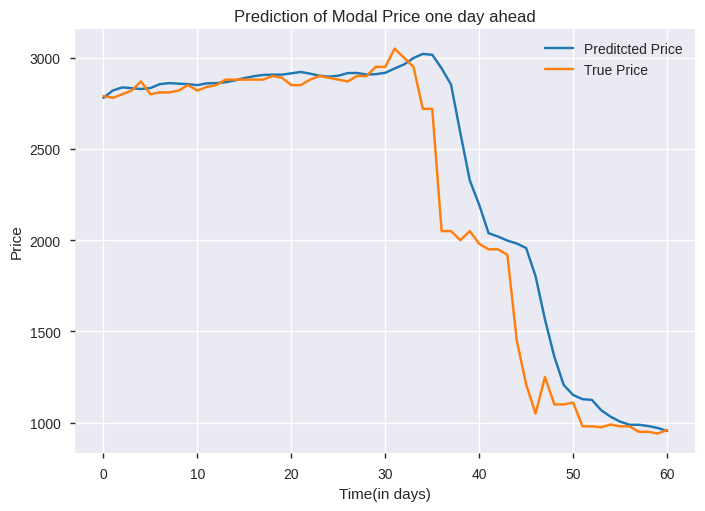

In [247]:
plt.plot(y_pred[:,1,1])
plt.plot(y_test[:,1,1])
plt.title('Prediction of Modal Price one day ahead')
plt.ylabel('Price')
plt.xlabel('Time(in days)')
plt.legend(['Preditcted Price', 'True Price'], loc='upper right')
plt.show()

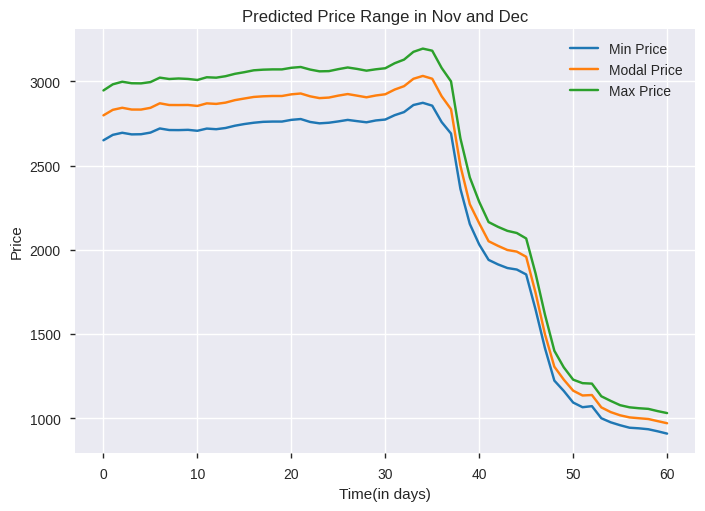

In [248]:
#One day ahead Predictions
plt.plot(y_pred[:,0,:])
plt.title('Predicted Price Range in Nov and Dec')
plt.ylabel('Price')
plt.xlabel('Time(in days)')
plt.legend(['Min Price','Modal Price','Max Price'], loc='upper right')
plt.show()


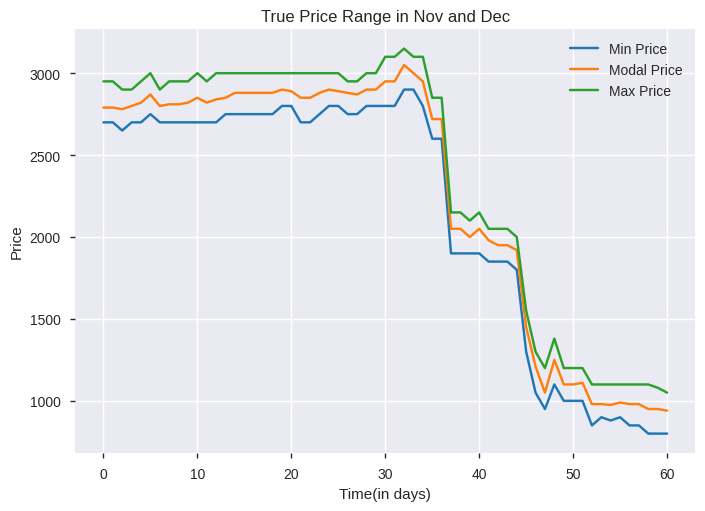

In [249]:
plt.plot(y_test[:,0,:])
plt.title('True Price Range in Nov and Dec')
plt.ylabel('Price')
plt.xlabel('Time(in days)')
plt.legend(['Min Price','Modal Price','Max Price'], loc='upper right')
plt.show()